### Out Migrator Counts by Education Level (No Family Income)
\*PERWT *is* applied here (since the data doesn't directly address economic variables, such as income or rent)

In [1]:
import pandas as pd
import numpy as np
import altair as alt

In [2]:
outmigrators = pd.read_csv('ipums_clean.csv')

In [3]:
#Renaming & combining some labels from EDUC_DESC
education = {
0:'N/A or no schooling',
1:'Less than high school',
2:'Less than high school',
3:'Some high school',
4:'Some high school',
5:'Some high school',
6:'HS graduate',
7:'Some college',
8:'Some college',
9:'Some college',
10:"College graduate",
11:'Graduate school'}

outmigrators.EDUC_DESC = outmigrators.EDUC.map(education)

In [4]:
#Removing records with missing rent or mortgage values (assigned the value 0)
#Removing records with missing individual and/or family income values (assigned the value 9999999)
#Only keeping records of individuals who do not have family incomes
out_rent_inc = outmigrators[(outmigrators.RENT != 0) & (outmigrators.INCTOT != 9999999) & (outmigrators.FTOTINC != 9999999) & (outmigrators.INCTOT >= outmigrators.FTOTINC)]

In [5]:
#Calculating annual out migration counts for each education level
educ = pd.DataFrame()
for year in range(2006,2018):
    df = out_rent_inc[out_rent_inc.YEAR == year]
    ed_levels = out_rent_inc.EDUC_DESC.unique()
    counts = {}
    
    for level in ed_levels:
        count = df.PERWT[df.EDUC_DESC == level].sum()
        counts[level] = count

    educ_df = pd.DataFrame.from_dict(counts, orient='index')
    educ_df = educ_df.reset_index().rename({'index':'Education Level', 0:'Count'}, axis=1)
    educ_df['Year'] = np.full(len(educ_df), year)
    
    educ = pd.concat([educ, educ_df])

In [6]:
educ.head()

,Education Level,Count,Year
0,Some college,25164,2006
1,N/A or no schooling,1265,2006
2,College graduate,19033,2006
3,Graduate school,8306,2006
4,HS graduate,24256,2006


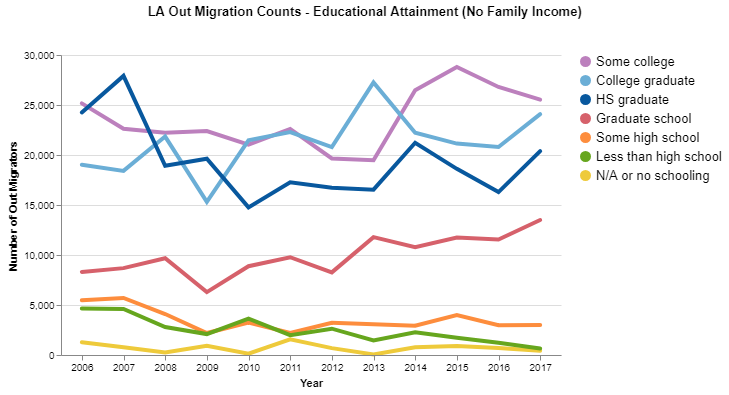

In [7]:
#Plotting via Altair
title=alt.TitleParams(text='LA Out Migration Counts - Educational Attainment (No Family Income)', anchor='middle', offset=30)
education = alt.Chart(educ).configure_axis(labelAngle=0).mark_line(strokeWidth=4, strokeCap='round').encode(
    x=alt.X('Year:O', 
            title='Year', 
            axis=alt.Axis(labelFlush=False, grid=False)), 
    y=alt.Y('Count', 
            title='Number of Out Migrators',
            scale=alt.Scale(domain=(0,30000))), 
    color=alt.Color('Education Level', 
                    title=None, 
                    scale=alt.Scale(domain=['Some college', 'College graduate', 'HS graduate',  'Graduate school', 'Some high school', 
                                            'Less than high school', 'N/A or no schooling',],
                                    range=['#bc80bd', '#6baed6', '#08589e', '#d6616b', '#fd8d3d', '#66a61e', '#eeca3b']))
).properties(width=500, title=title, background='white'
).configure_legend(labelFontSize=13, 
                   symbolStrokeWidth=5.5, 
                   symbolSize=30
).configure_view(strokeWidth=0)

education

In [8]:
education.save('educ_ind_out_no_fam.png', scale_factor=3)